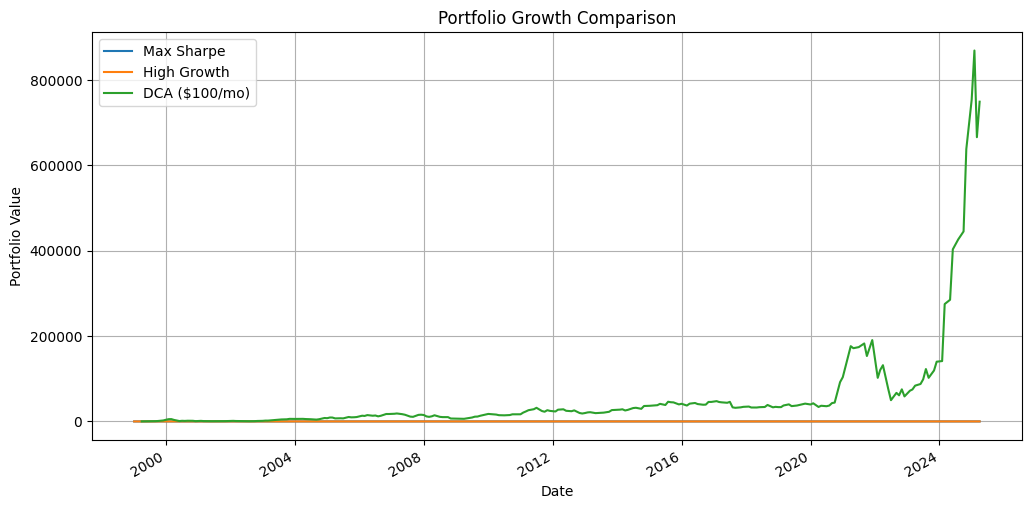

C:\Users\chris\AppData\Local\Temp\ipykernel_10144\2574751822.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_return = (series[-1] / series[0]) - 1


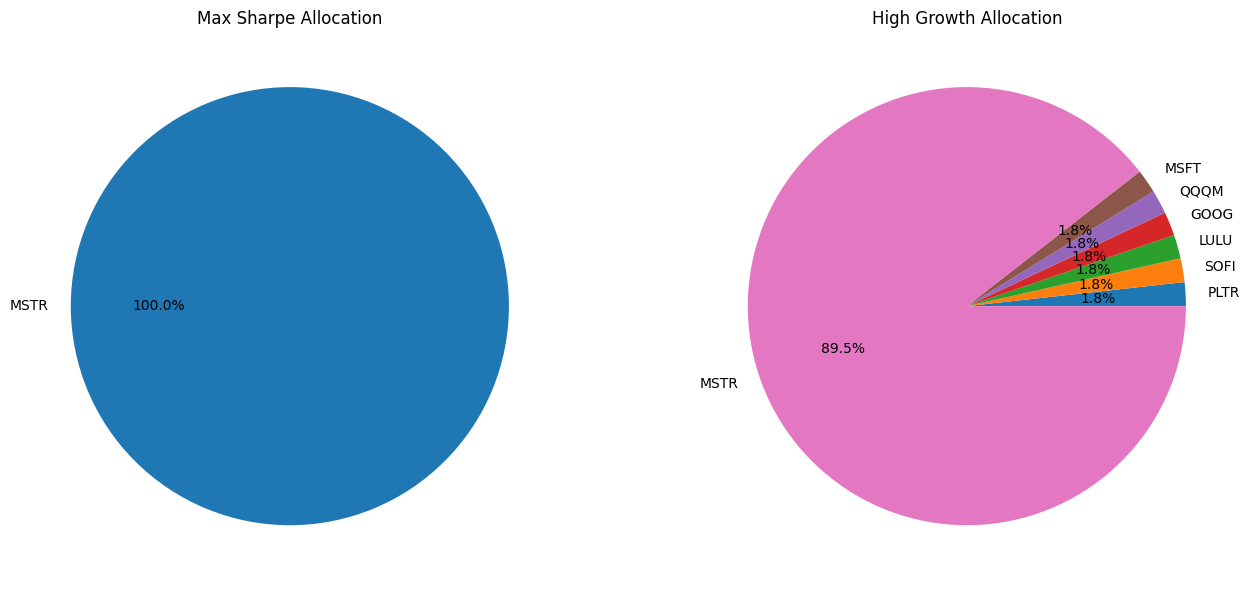

C:\Users\chris\AppData\Local\Temp\ipykernel_10144\2574751822.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe[-1],
C:\Users\chris\AppData\Local\Temp\ipykernel_10144\2574751822.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  high_growth[-1],
C:\Users\chris\AppData\Local\Temp\ipykernel_10144\2574751822.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dca[-1]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load portfolio values
max_sharpe = pd.read_csv("../outputs/results/max_sharpe_portfolio_value.csv", index_col=0, parse_dates=True).squeeze("columns")
high_growth = pd.read_csv("../outputs/results/high_growth_portfolio_value.csv", index_col=0, parse_dates=True).squeeze("columns")
dca = pd.read_csv("../outputs/results/dca_simulation_high_growth.csv", index_col=0, parse_dates=True).squeeze("columns")

common_end = dca.index[-1]
max_sharpe = max_sharpe.loc[:common_end]
high_growth = high_growth.loc[:common_end]

plt.figure(figsize=(12, 6))
max_sharpe.plot(label="Max Sharpe")
high_growth.plot(label="High Growth")
dca.plot(label="DCA ($100/mo)")
plt.title("Portfolio Growth Comparison")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.legend()
plt.show()

def metrics(series):
    returns = series.pct_change().dropna()
    cum_return = (series[-1] / series[0]) - 1
    vol = returns.std() * np.sqrt(252)
    sharpe = (returns.mean() * 252 - 0.02) / (returns.std() * np.sqrt(252))
    return [cum_return, vol, sharpe]

summary = pd.DataFrame({
    "Max Sharpe": metrics(max_sharpe),
    "High Growth": metrics(high_growth),
    "DCA": metrics(dca)
}, index=["Cumulative Return", "Annual Volatility", "Sharpe Ratio"])

summary = summary.T.style.format({
    "Cumulative Return": "{:.2%}",
    "Annual Volatility": "{:.2%}",
    "Sharpe Ratio": "{:.2f}"
})

summary

# Load weights
sharpe_weights = pd.read_csv("../data/processed/max_sharpe_weights.csv", index_col=0).squeeze()
growth_weights = pd.read_csv("../data/processed/high_growth_weights.csv", index_col=0).squeeze()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sharpe_weights[sharpe_weights > 0.01].sort_values().plot.pie(ax=axs[0], autopct="%1.1f%%")
axs[0].set_title("Max Sharpe Allocation")
axs[0].set_ylabel("")

growth_weights[growth_weights > 0.01].sort_values().plot.pie(ax=axs[1], autopct="%1.1f%%")
axs[1].set_title("High Growth Allocation")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()

summary_df = pd.DataFrame({
    "Strategy": ["Max Sharpe", "High Growth", "DCA"],
    "Final Value": [
        max_sharpe[-1],
        high_growth[-1],
        dca[-1]
    ]
})

summary_df.to_csv("../outputs/reports/final_dashboard_summary.csv", index=False)
